## Decision Tree

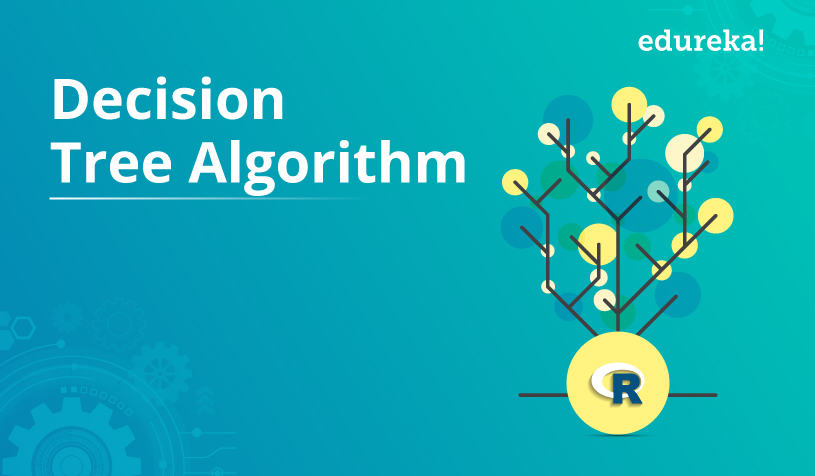

In [1]:
from IPython.display import display, Image

display(Image("Decision-Tree-Algorithm.jpg"))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
import plotly.express as px


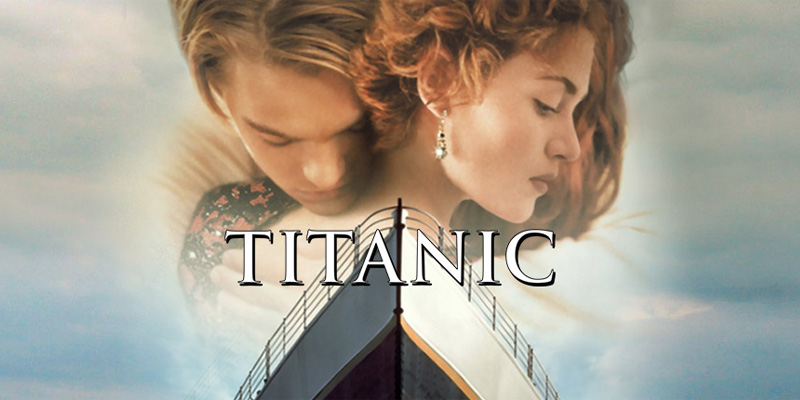

In [24]:
from IPython.display import display, Image

display(Image("titanic.jpg"))


In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df = df[["Pclass", "Sex", "Age", "Fare", "Survived"]]

In [6]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [7]:
df.Sex.replace(to_replace=["female","male"],value=[0,1],inplace=True)

C:\Users\NooR\AppData\Local\Temp\ipykernel_15664\3881670413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace(to_replace=["female","male"],value=[0,1],inplace=True)
C:\Users\NooR\AppData\Local\Temp\ipykernel_15664\3881670413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex.replace(to_replace=["female","male"],value=[0,1],inplace=True)


In [8]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [9]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [37]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


C:\Users\NooR\AppData\Local\Temp\ipykernel_15664\1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\NooR\AppData\Local\Temp\ipykernel_15664\1226013979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [38]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [39]:
x = df.drop(columns=['Survived'])  
y = df['Survived']  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [50]:
X_train

,Pclass,Sex,Age,Fare
417,2,0,18.0,13.0000
104,3,1,37.0,7.9250
167,3,0,45.0,27.9000
26,3,1,28.0,7.2250
263,1,1,40.0,0.0000
...,...,...,...,...
361,2,1,29.0,27.7208
563,3,1,28.0,8.0500
837,3,1,28.0,8.0500
628,3,1,26.0,7.8958


In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(x,y)

DecisionTreeClassifier()

In [43]:
model.score(X_test,y_test)

0.9776536312849162

In [44]:
model.score(X_train,y_train)

0.9775280898876404

In [45]:
model.predict([[1,1,23,24]])

c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [68]:
importances =model.feature_importances_

In [69]:
importances

array([0.10121707, 0.27530014, 0.28222256, 0.34126023])

In [70]:
features = X_train.columns

In [71]:
feat_imp = pd.Series(importances,index=features)

In [72]:
feat_imp

Pclass    0.101217
Sex       0.275300
Age       0.282223
Fare      0.341260
dtype: float64

In [ ]:
px.bar(data_frame = feat_imp, x= importances, y= features)

In [ ]:
ypredict = model.predict(X_test)

In [90]:
ypredict = model.predict(X_test)
accuracy = accuracy_score(y_test,ypredict)
accuracy

0.8044692737430168

In [87]:
model.score(X_test,y_test)

0.8044692737430168